# Flou ou Blur

## Sommaire

- Description du problème
- But
- Les recherches scientifiques
    - Les librairies
        - Matplolib
        - OpenCV
        - PIL/Pillow
        - Skimage
    - Création d'un dataset
        - Reconnaissance des images
        - Tests sur les images
    - Deep Learning
    - Mise en place
    - Test réel
- Conclusion


## Description du problème
Le problème est avoir un flou ou lissage sur une image. Voici des examples :

Origine|Blur
:-------------------------:|:-------------------------:
![Default 1048 Clean](Dataset/Train/Clean/default_1048.jpg)  |  ![Default 1048 Blur](Dataset/Train/Blur/default_1048_Blur.jpg)

## But

Le but final est de retrouver une image semblabe à l'origine. Mais il y a une perte de données assez conséquentes donc nous allons devoir utiliser du deep learning pour effectuer les réparations.

## Les recherches scientifiques

Avant d'effectuer quelconque opérations et avant d'utiliser le deep learning, les intervenants nous ont recommandé d'utiliser des librairies natives de traitement d'image pour avoir un premier résultat.

Je me renseigne sur les différents outils et effectuer quelques tests. Je trouve plusieurs outils tels que OpenCV et PIL

### Les librairies

#### Matplotlib

Wikipédia m'indique :
> Matplotlib est une bibliothèque du langage de programmation Python destinée à tracer et visualiser des données sous formes de graphiques. Elle peut être combinée avec les bibliothèques python de calcul scientifique NumPy et SciPy

Je l'utiliserai pour voir des images, graphiques pour analyser les images :

Pour installer matplotlib :

```
pip install matplotlib
```

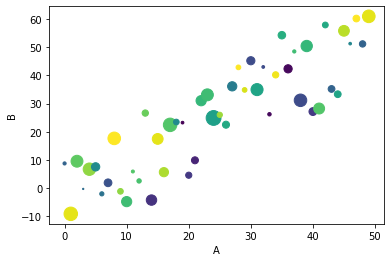

In [25]:
import numpy as np
from matplotlib import pyplot as plt

data = {'a': np.arange(50),
        'c': np.random.randint(0, 50, 50),
        'd': np.random.randn(50)}
data['b'] = data['a'] + 10 * np.random.randn(50)
data['d'] = np.abs(data['d']) * 100

plt.scatter('a', 'b', c='c', s='d', data=data)
plt.xlabel('A')
plt.ylabel('B')
plt.show()

#### OpenCV

> OpenCV est une bibliothèque graphique libre, initialement développée par Intel, spécialisée dans le traitement d'images en temps réel.

OpenCV permet de manipuler les images. J'ai eu un premier problème avec OpenCV, quand il ouvre une image, les pixels sont ouvert en BGR (Blue Green Red). Alors que le "standard" est en RGB (Red Green Blue). Voici le code source pour ouvrir une image et l'afficher avec jupyter

Voici l'installation de OpenCV

```
pip install opencv-python
```

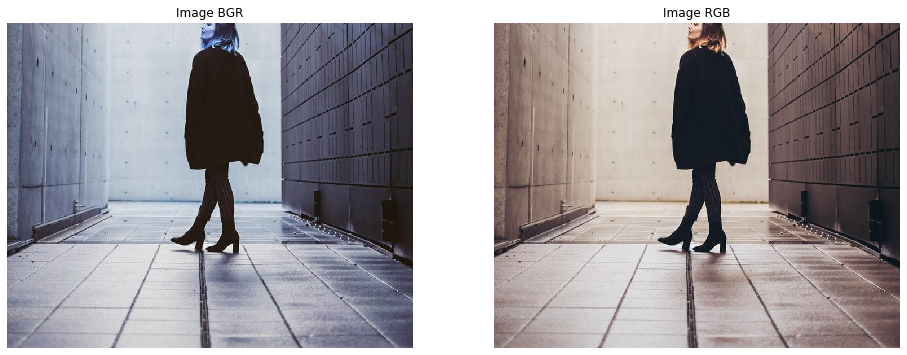

In [35]:
from matplotlib import pyplot as plt
import cv2

img = cv2.imread('Dataset/Train/Clean/default_1048.jpg')

fig=plt.figure(figsize=(16, 16))

fig.add_subplot(1, 2, 1)
plt.imshow(img)
plt.title('Image BGR')
plt.axis('off')

fig.add_subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Image RGB')
plt.axis('off')
plt.show()

#### PIL / Pillow

> Python Imaging Library (PIL) est une bibliothèque de traitement d'images pour le langage de programmation Python. Elle permet d'ouvrir, de manipuler, et de sauver différents formats de fichiers graphiques. 

Pillow ressemble à OpenCV mais elle est "native" à Python. Elle a d'autre fonction que OpenCV. Les 2 librairies sont complémentaire. Voici la commande pour l'installer :

```
pip install Pillow
```

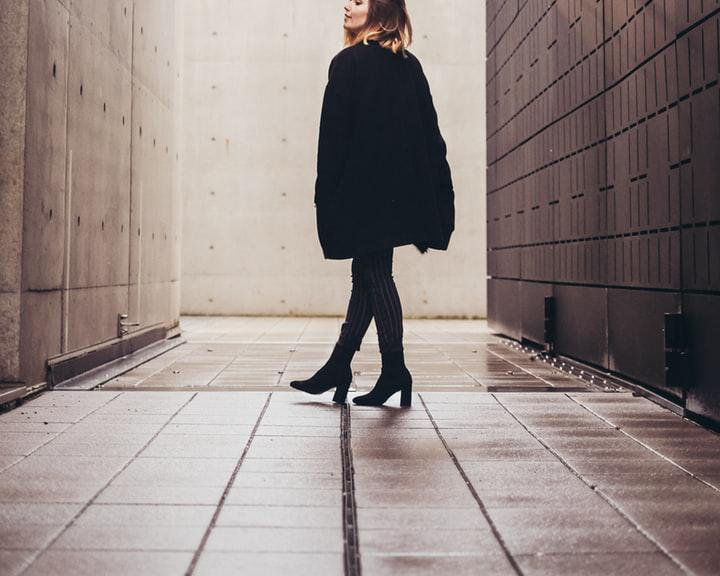

In [26]:
from PIL import Image

im = Image.open("Dataset/Train/Clean/default_1048.jpg")
display(im)

#### Scikit-image

Scikit-image est un ensemble d'algorithmes pour transformer, modifier, editer des images. Je l'utiliserai pour tester certaine fonctionnalité pour supprimer le flou d'une image

```
pip install scikit-image
```
Un bout de code pour charger est afficher une image :

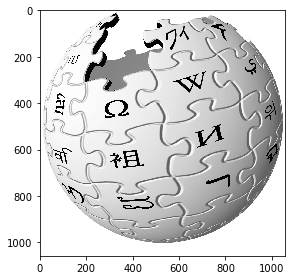

In [5]:
from skimage import io          # Module scikit-image

fichier = 'http://upload.wikimedia.org/wikipedia/commons/d/de/Wikipedia_Logo_1.0.png'
logoWiki = io.imread(fichier)   # Lecture et création d'un tableau numpy
io.imshow(logoWiki)             # Affichage étape 1
io.show()                       # Affichage étape 2

### Création d'un dataset

Pour tester des images et voir les différents et entrainer le machine learning, il faut créer un dataset. Un dataset est ensemble de données. Mais avant il faut télécharger un maximum d'image open source et libre de droit. 

Voici un code pour obtenir une image : (effectuer une boucle while pour en avoir plusieurs)

In [27]:
from PIL import Image  
import PIL  
import requests
from io import BytesIO

response = requests.get(r"https://source.unsplash.com/random/720x576")
img = Image.open(BytesIO(response.content))

img = img.save("./default.jpg")

Quand un ensemble de donnée est enregistré dans un dossier "data_img". J'ai créer une fonction permettant de blur les images pour entrainer le ML.

Je crée un dossier "dataset" avec dedans un dossier "clean" et un dossier "blur". Dans chaque fichier clean et blur, il faut un fichier "Train" et "Test"

In [73]:
import random
import os, os.path
import PIL.Image, PIL.ImageFilter

DIR = './data_img'
DIR_DATASET = './dataset/'
num = 500

def generation_blur(folder):
    random_index = str(int(random.random()*(len([name for name in os.listdir(DIR) if os.path.isfile(os.path.join(DIR, name))])-1)))
    random_image = DIR+"/default_"+random_index+".jpg"
    im = PIL.Image.open(random_image)
    im.save(DIR_DATASET+folder+"/clean/default_"+random_index+".jpg")
    im2 = im.filter(PIL.ImageFilter.BLUR)
    im2.save(DIR_DATASET+folder+"/blur/default_"+random_index+"_blur.jpg")

def number_blur(nbr, folder):
    for i in range(0, int(nbr)):
        generation_blur(folder)

def start_blur():
    number_blur(num*0.8, 'Train')
    number_blur(num*0.2, 'Test')

#### Reconnaissance des images

J'ai créé un check si l'image est flouter ou non. Voici le code source :

In [76]:
import cv2

img = cv2.imread('default-blur.jpg')

if(img.ndim == 3):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

cv2.Laplacian(img, cv2.CV_64F).var()

80.18107048546896

Si l'indice est en dessous de 100-120, alors elle est flouttée.

Ici, c'est 80 donc cela confirme que l'image est belle et bien flouttée

Checkons l'image original :

In [77]:
import cv2

img = cv2.imread('default.jpg')

if(img.ndim == 3):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

cv2.Laplacian(img, cv2.CV_64F).var()

1205.4659646625923

#### Tests sur les images

Je vais transformer les 3 couleurs (RGB) en gris pour pouvoir voir les niveau et les lignes permet de voir l'image et déflouter

/opt/conda/lib/python3.7/site-packages/skimage/util/dtype.py:135: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


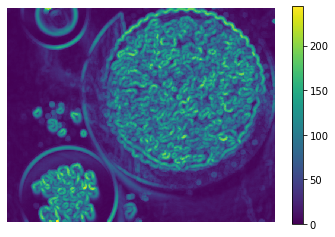

In [32]:
import matplotlib.pyplot as plt

from skimage import data, io
from skimage.color import rgb2gray
from skimage.morphology import disk
from skimage.filters.rank import gradient

cat = io.imread('default-blur.jpg') # cat is a 300-by-451 pixel RGB image
cat_gray = rgb2gray(cat)

selection_element = disk(5) # matrix of n pixels with a disk shape

cat_sharpness = gradient(cat_gray, selection_element)

plt.imshow(cat_sharpness, cmap="viridis")
plt.axis('off')
plt.colorbar()

plt.show()

Pas concluant mais très beau... On dirait une molécule dans les laboratoires de sang ;)
Je vais essayer maintenant des librairies de réparation des images

array([[0.02540708, 0.08973374, 0.23622935, ..., 0.23090516, 0.08720641,
        0.02589906],
       [0.0919905 , 0.32219905, 0.84900509, ..., 0.79441523, 0.29938747,
        0.08806193],
       [0.24295161, 0.84634586, 1.        , ..., 1.        , 0.79342013,
        0.23191306],
       ...,
       [0.21101582, 0.7517035 , 1.        , ..., 1.        , 0.64561459,
        0.17822604],
       [0.08097873, 0.28497659, 0.74163635, ..., 0.6428097 , 0.24030992,
        0.06598924],
       [0.0227485 , 0.08020063, 0.20869784, ..., 0.18034678, 0.06795598,
        0.01878794]])

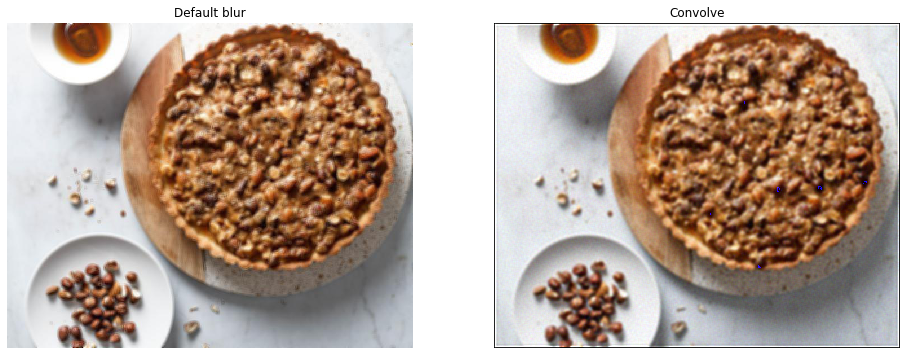

In [69]:
from skimage import color, data, restoration, io
import matplotlib.pyplot as plt
from scipy.signal import convolve2d

fig=plt.figure(figsize=(16, 16))
data_img = io.imread('default-blur.jpg')

fig.add_subplot(1, 2, 1)
plt.imshow(data_img)
plt.title('Default blur')
plt.axis('off')
r = data_img[:,:,0]/255.0
g = data_img[:,:,1]/255.0
b = data_img[:,:,2]/255.0

def convol(couche):
    psf = np.ones((5, 5)) / 25
    couche = convolve2d(couche, psf, 'same')
    couche += 0.1 * couche.std() * np.random.standard_normal(couche.shape)
    deconvolved = restoration.richardson_lucy(couche, psf, 5)
    return deconvolved

img_out = np.zeros((data_img.shape[0], data_img.shape[1], 3))
display(convol(r))
img_out[:,:,0] = convol(r)
img_out[:,:,1] = convol(g)
img_out[:,:,2] = convol(b)

fig.add_subplot(1, 2, 2)
plt.imshow((img_out * 255).astype(np.uint8))
plt.title('Lucy – Richardson')
plt.axis('off')
plt.show()

J'utilise l'algorithme Richardson-Lucy. Celui est connu sous le nom de déconvolution Lucy – Richardson, est une procédure itérative pour récupérer une image sous-jacente qui a été floue par une fonction d'étalement de points connue. Il a été nommé d'après William Richardson et Leon Lucy, qui l'ont décrit indépendamment. 

Sur l'image affiché, rien ne vas... Des pixels en plus prononcé (Violet) Donc ce n'est pas la bonne solution ...

Je cherche une autre solution en cherchant "unblur image" mais pour l'insant Photoshop arrive à réparer une image correctement mais pas trop en open source. Donc j'essaie d'autre technique avec l'objectifs moins haut

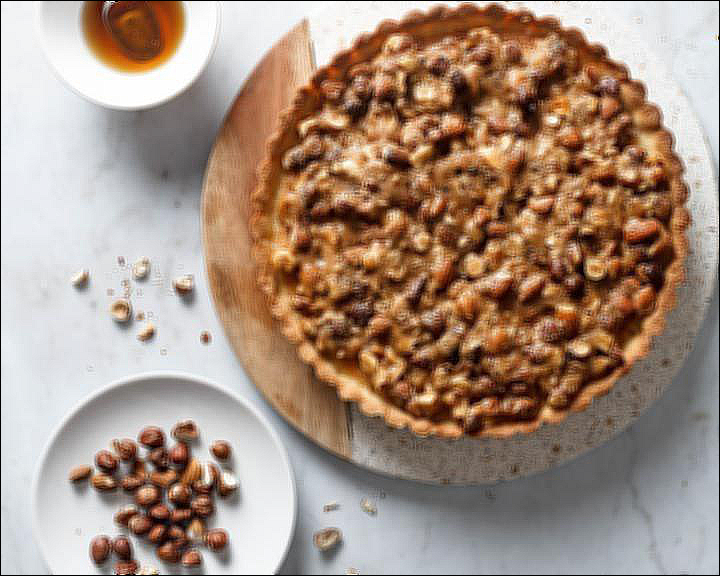

In [72]:
from PIL import Image, ImageDraw

# Load image:
input_image = Image.open("default-blur.jpg")
input_pixels = input_image.load()
nbr_kernel = 1 / 9
# Low-pass kernel
kernel = [[nbr_kernel, nbr_kernel, nbr_kernel],
          [nbr_kernel, nbr_kernel, nbr_kernel],
          [nbr_kernel, nbr_kernel, nbr_kernel]]

amount = 2

# Middle of the kernel
offset = len(kernel) // 2

# Create output image
output_image = Image.new("RGB", input_image.size)
draw = ImageDraw.Draw(output_image)

# Compute convolution with kernel
for x in range(offset, input_image.width - offset):
    for y in range(offset, input_image.height - offset):
        original_pixel = input_pixels[x, y]
        acc = [0, 0, 0]
        for a in range(len(kernel)):
            for b in range(len(kernel)):
                xn = x + a - offset
                yn = y + b - offset
                pixel = input_pixels[xn, yn]
                acc[0] += pixel[0] * kernel[a][b]
                acc[1] += pixel[1] * kernel[a][b]
                acc[2] += pixel[2] * kernel[a][b]

        new_pixel = (
            int(original_pixel[0] + (original_pixel[0] - acc[0]) * amount),
            int(original_pixel[1] + (original_pixel[1] - acc[1]) * amount),
            int(original_pixel[2] + (original_pixel[2] - acc[2]) * amount)
        )
        draw.point((x, y), new_pixel)
        
display(output_image)

Bon... Là c'est mieux mais c'est plein de carré de pixel ce qui me semble compliqué à "lisser" sans que celle-ci revienne à l'original de l'image flouté.

Donc c'est la mauvaise façon de faire... Je regarde la méthode : "unsupervised wiener". Malheureusement, j'ai que des méthodes permettant de traiter des images en noir et blanc. Donc je dois le faire pour chaque couche de couleur RGB

array([[0.95686275, 0.95686275, 0.95686275, ..., 0.88627451, 0.89019608,
        0.89411765],
       [0.95686275, 0.95686275, 0.95686275, ..., 0.88235294, 0.88235294,
        0.88235294],
       [0.95294118, 0.95294118, 0.95294118, ..., 0.87843137, 0.8745098 ,
        0.87058824],
       ...,
       [0.81960784, 0.81960784, 0.81960784, ..., 0.72156863, 0.73333333,
        0.74901961],
       [0.81960784, 0.81960784, 0.81960784, ..., 0.71764706, 0.73333333,
        0.74901961],
       [0.81960784, 0.81960784, 0.81960784, ..., 0.71372549, 0.72941176,
        0.74901961]])

array([[0.19460265, 0.30481315, 0.49421626, ..., 0.37692611, 0.16622152,
        0.15207935],
       [0.28093858, 0.43589572, 0.6745698 , ..., 0.55138509, 0.31562649,
        0.25114561],
       [0.51712914, 0.72364457, 1.        , ..., 0.89924812, 0.59791287,
        0.50362151],
       ...,
       [0.39481766, 0.51726536, 0.80425368, ..., 0.67430182, 0.41228546,
        0.32145474],
       [0.25094972, 0.34013549, 0.55905497, ..., 0.4218295 , 0.20801786,
        0.16174759],
       [0.17947672, 0.2744297 , 0.46752348, ..., 0.30970131, 0.13682568,
        0.13489033]])

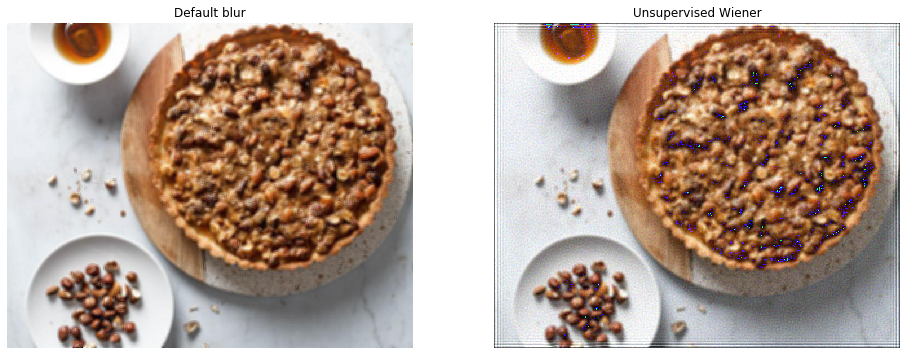

In [92]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import color, data, restoration, io
from scipy.signal import convolve2d as conv2

fig=plt.figure(figsize=(16, 16))

image = io.imread('default-blur.jpg')

fig.add_subplot(1, 2, 1)
plt.imshow(image)
plt.title('Default blur')
plt.axis('off')

r = image[:,:, 0]/255.0
display(r)
g = image[:,:, 1]/255.0
b = image[:,:, 2]/255.0

def unwien(couche):
    psf = np.ones((5, 5)) / 25
    couche = conv2(couche, psf, 'same')
    couche += 0.1 * couche.std() * np.random.standard_normal(couche.shape)
    deconvolved, _ = restoration.unsupervised_wiener(couche, psf)
    
    return deconvolved


rgbArray = np.zeros((image.shape[0],image.shape[1],3), 'uint8')
rgbArray[..., 0] = unwien(r)*255
rgbArray[..., 1] = unwien(g)*255
rgbArray[..., 2] = unwien(b)*255

fig.add_subplot(1, 2, 2)
plt.imshow((rgbArray).astype(np.uint8))
plt.title('Unsupervised Wiener')
plt.axis('off')
plt.show()

Alors, c'est mieux mais le même problème, j'ai des pixel de couleur en saturation (vert et violet)... Donc je bascule sur du machine learning pour régler les problèmes (en espèrant que j'ai assez de puissance de calcul pour ça)

### Deep Learning

J'ai recherché, testé, compilé plusieurs code source de github. Voici le lien : [https://github.com/subeeshvasu/Awesome-Deblurring](https://github.com/subeeshvasu/Awesome-Deblurring). Voici la liste que j'ai essayé de mettre en place :

|Lien|Avis|
|----|----|
|[https://github.com/TAMU-VITA/DeblurGANv2](https://github.com/TAMU-VITA/DeblurGANv2)| Ne compile pas - librairie Torche ne fonctionne pas avec les versions différentes|
|[https://github.com/RaphaelMeudec/deblur-gan](https://github.com/RaphaelMeudec/deblur-gan)| Compile, mais le training et le test ne fonctionne pas|
|[https://github.com/LeeDoYup/DeblurGAN-tf](https://github.com/LeeDoYup/DeblurGAN-tf)| Compile, mais problème de processeur avec mon ordinateur (besoin de CUDA qui ne fonctionne pas de mon côté)
|[https://github.com/KupynOrest/DeblurGAN](https://github.com/KupynOrest/DeblurGAN)| Me semble un fork de RaphaelMeudec ... Donc fonctionne pas|

J'ai perdu beaucoup de temps à chercher une librairie 

Finalement, je choisi :
- [https://github.com/idealo/image-super-resolution](https://github.com/idealo/image-super-resolution)

    L'objectif de ce projet est d'améliorer la qualité des images en basse résolution.
    Ce projet contient des implémentations Keras de différents réseaux de densité résiduelle pour la super-résolution d'une seule image (ISR) ainsi que des scripts pour former ces réseaux en utilisant des composants de perte de contenu et d'adversité.

## Mise en place

Maintenant que nous avons plein de tests, de fonctions, d'expériences, il me reste 2 jours pour tout compilé et écrire la documentation ...

J'ai mis dans une classe l'ensemble des fonctions que j'ai trouvé et pouvant être pertinente pour le projet

Voici comment l'utiliser :

In [1]:
from blur import Blur

b = Blur(log=True)
b.load('./default.jpg')
b.recognize()

Score : 1209.0679790759277


'Clean'

J'essaie maintenant le code de la librairie ISR. Je l'ai implementé dans la classe Blur avec la méthode : "unblur()". Dans notre cas, l'image est propre donc je dois ajouter la méthode pour floutter l'image

In [2]:
b.blur()
b.unblur()

GANS work
Scale work


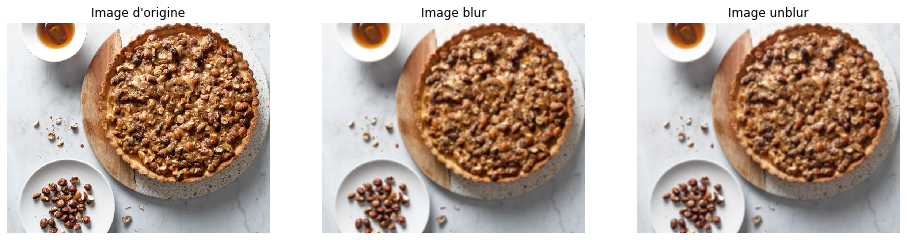

In [3]:
b.show()

Visualisation des scors de blur entre les deux images (sans celle d'origine) pour savoir si il existe un différence ou non

In [4]:
b.scoring_unblur()

Score original : 1209.0679790759277
Score blur : 74.70786140617484
Score unblur : 111.26000993153322


Je vois une différence mais pas significative par rapport à l'image originale... Il faudrait re-entrainer le models avec une puissance de calcule plus forte qu'a actuellement mon ordinateur... malheureusement, je ne peux suivre cette expérience

## Test réel

Maintenant, prenons l'ensemble des fonctions créer par le groupe et regardons la matrice de confusion

In [40]:
import base_functions as bf
import numpy as np
import pandas as pd
from blur import Blur

DIR_DATA = './CESI/'
FILE_CSV = './dataset_problems.csv'

data_csv = bf.get_labelized_images_name('Blur ', FILE_CSV)

data_csv_full = pd.read_csv(FILE_CSV, sep=";")
data_csv_full = data_csv_full['file']

true_pos, false_pos, true_neg, false_neg = 0, 0, 0, 0

b = Blur(path=DIR_DATA, max_limit=300)

for photo in data_csv_full :
    value = b.recognize(photo)
    if(value == 'Clean'):
        if( len(np.intersect1d(data_csv, [''+str(photo)])) >= 1 ):
            false_neg = false_neg + 1
        else:
            true_neg = true_neg + 1
    else:
        if(value == 'Blur'):
            if( len(np.intersect1d(data_csv, [''+str(photo)])) >= 1 ):
                false_pos = false_pos + 1
            else:
                true_pos = true_pos + 1
                
print('|---| V | F |')
print('|---|---|---|')
print('| P |'+str(true_pos)+'|'+str(false_pos)+'|')
print('|---|---|---|')
print('| N |'+str(true_neg)+'|'+str(false_neg)+'|')
print('|---|---|---|')

|---| V | F |
|---|---|---|
| P |210|132|
|---|---|---|
| N |370|192|
|---|---|---|


In [41]:
print(bf.accuracy(false_neg, false_pos, true_neg, true_pos))
print(bf.precision(false_neg, false_pos, true_neg, true_pos))
print(bf.recall(false_neg, false_pos, true_neg, true_pos))
print(bf.f1_score(false_neg, false_pos, true_neg, true_pos))

0.6415929203539823
0.6140350877192983
0.5223880597014925
0.5645161290322579


Plusieurs score que j'ai eu :

La limite va de 0 à + l'infini. Plus c'est proche de 0, plus c'est floue. Dans mes tests, j'essaie d'avoir le minimum de Faux-Négatifs qui seront des images non traité. En aperçevant quelque algorithme permettant de supprimer le flou, les photos nettes est d'avantage mieux. Donc les faux positifs sont pas problèmatiques surtout dans le projet de restauration d'image de VHS

1.  Pour une limite de 180 :<br>
    0.6415929203539823 - accuracy <br>
    0.6280487804878049 - precision <br>
    0.2814207650273224 - recall<br>

Voici pour une premier itération

|| V | F |
|---|---|---|
| P | 52| 32|
||||
| N |528|292|

Une seconde itération pour comme limite 250 :

|| V | F |
|---|---|---|
| P |121|74|
||||
| N |459|250|

Je n'ai pas pris la notation des scores pour cette limite car j'ai directement pris la limite de 300 qui est raisonable car les faux négatifs sont en dessous de 25% (environ 180 images) non traités

2.  Pour une limite de 300 :<br>
    0.6415929203539823 - accuracy<br>
    0.6140350877192983 - precision<br>
    0.5223880597014925 - recall<br>
    0.5645161290322579 - F1
    
|| V | F |
|---|---|---|
| P |210|132|
||||
| N |370|192|

## Conclusion

C'est un projet très interessant, avec beaucoup de potentielle mais manque énormément de puissance de calcul et de temps. La reconnaissance est bien faite, la réparation est trop compliqué car il faut des semaines/mois de recherche uniquement sur un sujet et non sur un ensemble de problème d'une image.

J'ai beaucoup appris durant ces semaines. Je commence de très loin (aucune connaissance) à un résonnement de machine learning avec Keras et TensorFlow. J'ai beaucoup parcouru de site, revu scientifique et articles à vocation d'aider et d'avancer la recherche qu'il faudrait être dans un corps de métier spécifique. Utilisé certain librairie comme PyTorch qui semble est un outils très puissant.

Je retiens beaucoup de notions suite à tout ces problèmes. Mais j'ai jamais abandonné la résolution.